In [3]:
from generative_example import get_real_data_preprocessed
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

In [37]:
X, y = get_real_data_preprocessed()
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])
print(len(X[0]))

(50000,)
(50000,)
b'costner drag movi far longer necessari asid terrif sea rescu sequenc care charact ghost closet costner charact realiz earli forgotten much later time care charact realli care cocki overconfid ashton kutcher problem come kid think hes better anyon els around show sign clutter closet obstacl appear win costner final well past half way point stinker costner tell kutcher ghost told kutcher driven best prior inkl foreshadow magic could keep turn hour'
0
449


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
X_v = vectorizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_v, y, test_size=0.5, random_state=0, stratify=y
)


In [36]:
# print(vectorizer.get_feature_names(),0)

In [8]:
print(X.toarray().shape)
# 50000 sentence, 69122 unique words

(50000, 69122)


In [9]:
# np.set_printoptions(threshold=sys.maxsize)


In [10]:
# print(X.toarray()[0])

In [11]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [12]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.89376
0.84548


In [13]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)

MultinomialNB()

In [14]:
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))

0.89636
0.84832


In [15]:
model.feature_log_prob_

array([[-7.64188444, -9.43364391, -9.43364391, -9.43364391, -8.74049673,
        -9.43364391, -8.74049673, -8.74049673, -9.43364391, -8.74049673,
        -9.43364391, -9.43364391, -8.74049673, -9.43364391, -8.74049673,
        -9.43364391, -8.74049673, -8.74049673, -9.43364391, -9.43364391,
        -9.43364391, -8.33503162, -8.74049673, -9.43364391, -8.74049673,
        -9.43364391, -9.43364391, -9.43364391, -8.04734955, -9.43364391,
        -8.74049673, -9.43364391, -9.43364391, -8.74049673, -9.43364391,
        -9.43364391, -9.43364391, -8.74049673, -9.43364391, -8.33503162,
        -9.43364391, -9.43364391, -9.43364391, -8.74049673, -8.33503162,
        -9.43364391, -9.43364391, -9.43364391, -7.824206  , -9.43364391,
        -9.43364391, -8.74049673, -8.74049673, -9.43364391, -8.74049673,
        -8.33503162, -9.43364391, -8.74049673, -8.74049673, -9.43364391,
        -9.43364391, -8.04734955, -9.43364391, -6.25559008, -8.74049673,
        -9.43364391, -9.43364391, -9.43364391, -9.4

In [16]:
model.feature_log_prob_.shape

(2, 69122)

In [17]:
prob = np.exp(model.feature_log_prob_)

In [18]:
prob

array([[4.79923212e-04, 7.99872020e-05, 7.99872020e-05, 7.99872020e-05,
        1.59974404e-04, 7.99872020e-05, 1.59974404e-04, 1.59974404e-04,
        7.99872020e-05, 1.59974404e-04, 7.99872020e-05, 7.99872020e-05,
        1.59974404e-04, 7.99872020e-05, 1.59974404e-04, 7.99872020e-05,
        1.59974404e-04, 1.59974404e-04, 7.99872020e-05, 7.99872020e-05,
        7.99872020e-05, 2.39961606e-04, 1.59974404e-04, 7.99872020e-05,
        1.59974404e-04, 7.99872020e-05, 7.99872020e-05, 7.99872020e-05,
        3.19948808e-04, 7.99872020e-05, 1.59974404e-04, 7.99872020e-05,
        7.99872020e-05, 1.59974404e-04, 7.99872020e-05, 7.99872020e-05,
        7.99872020e-05, 1.59974404e-04, 7.99872020e-05, 2.39961606e-04,
        7.99872020e-05, 7.99872020e-05, 7.99872020e-05, 1.59974404e-04,
        2.39961606e-04, 7.99872020e-05, 7.99872020e-05, 7.99872020e-05,
        3.99936010e-04, 7.99872020e-05, 7.99872020e-05, 1.59974404e-04,
        1.59974404e-04, 7.99872020e-05, 1.59974404e-04, 2.399616

In [19]:
model.class_count_

array([12500., 12500.])

In [20]:
np.exp(model.class_log_prior_)

array([0.5, 0.5])

In [21]:
first_feature = bernoulli.rvs(np.exp(model.feature_log_prob_[0, 0]), size=1000)

In [22]:
from sklearn.datasets import make_classification

In [23]:
Xg, yg = make_classification(1000, n_features=69122)

In [24]:
print(model.score(Xg, yg))


0.503


In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
sns.set()

In [26]:
predicted_labels = model.predict(X_train)

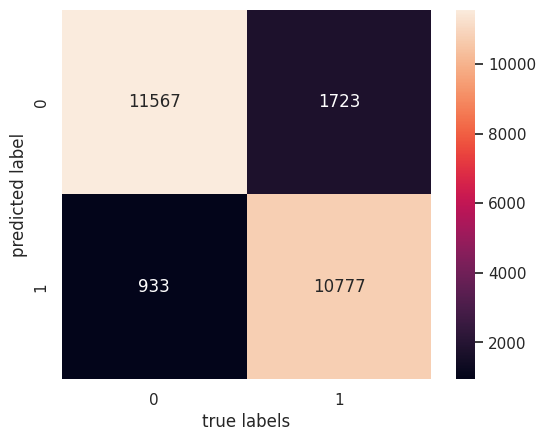

The accuracy is 0.894
The F1 score is 0.890


In [27]:
# plot the confusion matrix
mat = confusion_matrix(y_train, predicted_labels)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print(f"The accuracy is {accuracy_score(y_train, predicted_labels):.3f}")
print(f"The F1 score is {f1_score(y_train, predicted_labels):.3f}")

In [28]:
# show all the tokens in the positive class
pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()
print(np.take(vectorizer.get_feature_names(), pos_class_prob_sorted[-20:]))

['much' 'even' 'realli' 'would' 'also' 'love' 'well' 'charact' 'get'
 'stori' 'watch' 'great' 'make' 'good' 'see' 'time' 'like' 'one' 'movi'
 'film']


/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# show all the tokens in the negative class
neg_class_prob_sorted = model.feature_log_prob_[0, :].argsort()
print(np.take(vectorizer.get_feature_names(), neg_class_prob_sorted[-20:]))

['scene' 'much' 'dont' 'look' 'act' 'realli' 'charact' 'see' 'would' 'bad'
 'good' 'get' 'time' 'even' 'watch' 'make' 'like' 'one' 'film' 'movi']


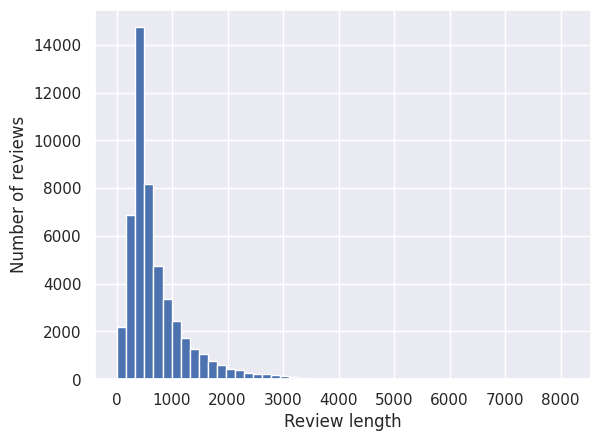

In [39]:
# plot review length
plt.hist([len(x) for x in X], bins=50)
plt.xlabel("Review length")
plt.ylabel("Number of reviews")
plt.show()

In [40]:
# fit a possion distribution to the review length
from scipy.stats import poisson
mu = np.mean([len(x) for x in X])
print(mu)
r = poisson.rvs(mu, size=3000)
print(r)

707.35278
[723 691 719 698 677 686 663 703 726 653 654 682 677 690 694 708 658 674
 711 733 700 669 706 727 682 740 698 698 727 694 716 717 765 701 644 655
 688 719 687 715 674 653 704 728 682 711 724 699 719 710 749 728 693 709
 726 680 715 691 701 726 713 699 681 737 750 670 672 702 694 630 710 692
 721 668 702 711 739 670 714 727 714 675 716 695 732 701 702 676 718 696
 672 686 742 691 714 662 718 748 710 702 740 704 761 714 697 732 696 733
 629 714 692 716 735 688 708 695 706 672 755 706 705 704 678 714 724 744
 682 686 662 775 679 691 657 704 710 712 647 654 695 699 765 724 722 734
 739 734 726 737 681 754 721 699 697 712 692 670 696 668 664 693 686 696
 724 725 725 703 707 705 685 719 679 719 703 656 682 689 740 711 709 708
 722 691 720 703 691 702 691 700 752 699 742 731 730 748 764 728 753 688
 723 681 795 683 696 710 676 713 691 685 714 730 691 692 713 700 743 685
 727 680 707 710 696 720 734 704 733 678 678 676 680 686 672 739 696 690
 714 695 716 727 725 709 742 703 730 747 

In [41]:
# generate 3000 positive review with words randomly drawn from the positive class with probability
# given by the model
pos_class_prob_sorted = model.feature_log_prob_[1, :].argsort()
pos_class_prob = np.exp(model.feature_log_prob_[1, :])
pos_class_prob = pos_class_prob / pos_class_prob.sum()
pos_class_prob = pos_class_prob[pos_class_prob_sorted]
# print(pos_class_prob)
# for i in range(30):
#     g=(np.take(vectorizer.get_feature_names(),np.random.choice(pos_class_prob_sorted,r[i], p=pos_class_prob)))
#     Xg = np.append(Xg,g)

# print(Xg[:10])
# print(pos_class_words)
# make 3000 sentences with 30 words each
# pos_class_words = np.random.choice(pos_class_prob_sorted, 3000*r, p=pos_class_prob)
# pos_class_words = pos_class_words.reshape(3000, r)
# print(pos_class_words)


/home/codespace/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


: 

: 